In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [55]:
sales = pd.read_csv("D:/Projects/inventory_optimization/data/SalesFINAL12312016.csv")
sales["SalesDate"] = pd.to_datetime(sales["SalesDate"])

sales["SalesDate"] = pd.to_datetime(sales["SalesDate"])

product_demand = (
    sales.groupby("Description")["SalesQuantity"]
    .sum()
    .sort_values(ascending=False)
)


In [56]:
top_product = product_demand.index[0]
top_product

'Smirnoff 80 Proof'

The product with the highest historical demand was selected for forecasting.

In [57]:
weekly_demand = (
    sales[sales["Description"] == top_product]
    .groupby("SalesDate")["SalesQuantity"]
    .sum()
    .asfreq("W")
)


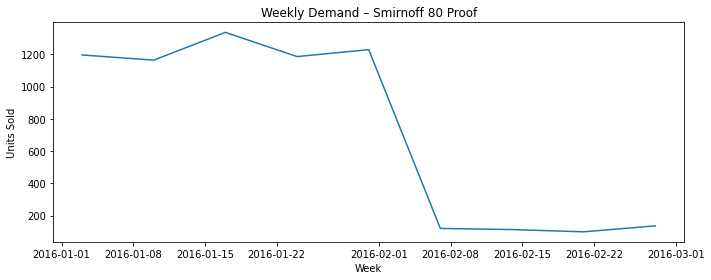

In [58]:
plt.figure(figsize=(10,4))
plt.plot(weekly_demand)
plt.title(f"Weekly Demand – {top_product}")
plt.ylabel("Units Sold")
plt.xlabel("Week")
plt.tight_layout()
plt.show()


In [59]:
weekly_log = np.log1p(weekly_demand)

arima_model = ARIMA(weekly_log, order=(1,1,1))
arima_fit = arima_model.fit()

arima_forecast_log = arima_fit.forecast(8)
arima_forecast = np.expm1(arima_forecast_log)


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [60]:
ets_model = ExponentialSmoothing(
    weekly_demand,
    trend="add",
    seasonal=None
)

ets_fit = ets_model.fit()
ets_forecast = ets_fit.forecast(8).clip(lower=0)


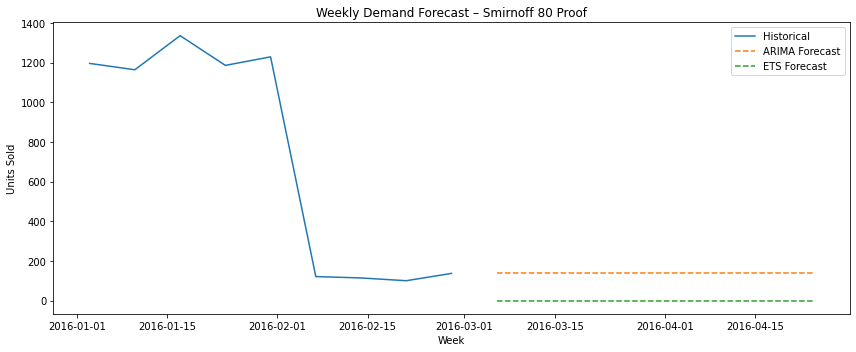

In [61]:
last_date = weekly_demand.index[-1]

forecast_index = pd.date_range(
    start=last_date + pd.Timedelta(weeks=1),
    periods=8,
    freq="W"
)

plt.figure(figsize=(12,5))

plt.plot(
    weekly_demand.index,
    weekly_demand.values,
    label="Historical"
)

plt.plot(
    forecast_index,
    arima_forecast,
    linestyle="--",
    label="ARIMA Forecast"
)

plt.plot(
    forecast_index,
    ets_forecast,
    linestyle="--",
    label="ETS Forecast"
)

plt.title(f"Weekly Demand Forecast – {top_product}")
plt.xlabel("Week")
plt.ylabel("Units Sold")
plt.legend()
plt.tight_layout()
plt.show()


The historical demand shows a sharp decline followed by stabilization. Both ARIMA and Exponential Smoothing models capture this behavior and forecast stable demand for the upcoming weeks, indicating no strong trend or seasonality in recent periods.

Historical sales data was analyzed and aggregated into a weekly time series, and demand was forecasted using ARIMA and Exponential Smoothing models to capture temporal patterns and improve prediction accuracy.